In [34]:
import sklearn

In [35]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y=make_circles(n_samples,noise=0.05,random_state=42)

In [36]:
len(X),len(y)

(1000, 1000)

In [37]:
print(f"First 5 X : \n {X[:5]}")
print(f"First 5 y : \n {y[:5]}")

First 5 X : 
 [[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]
First 5 y : 
 [1 1 1 1 0]


In [38]:
#Make dataframe of circle data
import pandas as pd
circles= pd.DataFrame({"X1":X[:,0], 
                       "X2":X[:,1],
                      "label":y})
print(circles.head())


         X1        X2  label
0  0.742207  0.246686      1
1 -0.734032  0.168692      1
2 -0.829859  0.221959      1
3 -0.429136  0.672230      1
4  0.445602 -0.894936      0


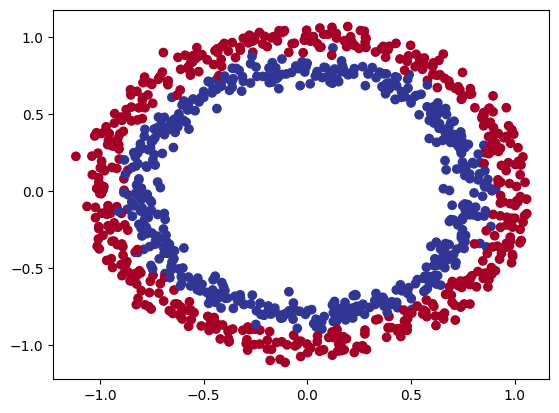

In [39]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
           y=X[:,1],
           c=y,
           cmap=plt.cm.RdYlBu)

Check Input and Output shapes

In [40]:
#Conver data to tensors
X.shape,y.shape

((1000, 2), (1000,))

# Conver data to tensors

In [41]:
import torch

In [42]:
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]))

In [43]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

In [44]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

  # Building a model



In [45]:
#Device agnostic code
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [46]:
X_train

tensor([[ 0.6772, -0.4456],
        [ 0.6030, -0.7328],
        [-1.0219, -0.1066],
        ...,
        [ 0.0011, -1.0504],
        [ 1.0259,  0.1799],
        [ 0.5597, -0.5673]])

In [47]:
#1. Construct a model that subclasses nn.Module
class CircleModelv0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=5)
        self.layer_2=nn.Linear(in_features=5,out_features=1)
#Forward pass
    def forward(self,x):
        return self.layer_2(self.layer_1(x))
# Instance of our model class
model_0=CircleModelv0().to(device)
model_0

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [48]:
device

'cuda'

In [49]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [50]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1551,  0.0631],
                      [ 0.1608, -0.2616],
                      [ 0.6660, -0.1664],
                      [-0.5082, -0.1845],
                      [-0.5123,  0.0615]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.5834,  0.3377,  0.6850, -0.0495, -0.5721], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2466,  0.1496, -0.1129, -0.4030,  0.2844]], device='cuda:0')),
             ('layer_2.bias', tensor([0.1854], device='cuda:0'))])

In [51]:
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [52]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6218, -0.4583],
                      [ 0.1383,  0.4900],
                      [ 0.3021,  0.4166],
                      [-0.5637, -0.0017],
                      [ 0.6273,  0.6862]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0620,  0.1235,  0.2630,  0.0253,  0.1851], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3311, -0.4404,  0.1731,  0.0473, -0.2850]], device='cuda:0')),
             ('1.bias', tensor([0.4274], device='cuda:0'))])

In [53]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f"Length of preds: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test sample: {len(X_test)}, Shape: {X_test.shape}")

print(f"\nFirst 10 preds:\n{torch.round(untrained_preds[:10])}")
print(f"First 10 labels:\n{y_test[:20]}")


Length of preds: 200, Shape: torch.Size([200, 1])
Length of test sample: 200, Shape: torch.Size([200, 2])

First 10 preds:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')
First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0.])


In [54]:
X_test[:10],y_test[:10]

(tensor([[-0.3625,  0.6737],
         [ 0.0591,  0.9342],
         [-0.6859, -0.3035],
         [-0.2535,  0.9820],
         [ 0.3849, -0.7893],
         [ 0.6429, -0.6119],
         [ 0.8778,  0.5384],
         [ 1.0174,  0.1922],
         [-0.7351, -0.3463],
         [ 0.0478,  0.9578]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

# Building a loss function and optimizer

In [55]:
#Set up loss function
loss_fn=nn.BCELoss()
loss_fn=nn.BCEWithLogitsLoss()

optimizer= torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [56]:
#Calculate Accuracy
def acc_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc   


 # Train a model 

 1. Forward pass
 2. Calculate
 3. optimize zero grad
 4. Backpropogation
 5. Optimizer step(Gradient Descent

In [57]:
model_0



Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [58]:
with torch.inference_mode():
    y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[0.2641],
        [0.2118],
        [0.4500],
        [0.2054],
        [0.5324]], device='cuda:0')

In [59]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [60]:
#Use the sigmoid activation function on logits
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5656],
        [0.5527],
        [0.6106],
        [0.5512],
        [0.6300]], device='cuda:0')

In [61]:
y_preds=torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

# Building training and t esting loop

In [62]:
torch.cuda.manual_seed(42)

epochs=100

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)


for epoch in range(epochs):

    model_0.train()

    y_logits=model_0(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))


    loss=loss_fn(y_logits,
                 y_train)
    acc=acc_fn(y_true=y_train,
              y_pred=y_pred)


    optimizer.zero_grad()


    loss.backward()


    optimizer.step()



    model_0.eval()

    with torch.inference_mode():
        test_logits=model_0(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))

        #2. Cal test loss/accuract
        test_loss=loss_fn(test_logits,
                         y_test)

        test_acc=acc_fn(y_true=y_test,
                       y_pred=test_pred)


        if epoch%10==0:
            print(f"Epoch:{epoch} | Loss:{loss:.5f}, Acc:{acc:.2f}% | Test Loss:{test_loss:.5f}, Test Acc:{test_acc:.2f}%")

        
        
    

Epoch:0 | Loss:0.71490, Acc:50.00% | Test Loss:0.70709, Test Acc:50.00%
Epoch:10 | Loss:0.70488, Acc:50.00% | Test Loss:0.69867, Test Acc:50.00%
Epoch:20 | Loss:0.69980, Acc:50.00% | Test Loss:0.69481, Test Acc:50.00%
Epoch:30 | Loss:0.69714, Acc:55.75% | Test Loss:0.69314, Test Acc:57.00%
Epoch:40 | Loss:0.69568, Acc:54.37% | Test Loss:0.69251, Test Acc:60.00%
Epoch:50 | Loss:0.69485, Acc:51.88% | Test Loss:0.69236, Test Acc:56.50%
Epoch:60 | Loss:0.69435, Acc:51.50% | Test Loss:0.69244, Test Acc:53.50%
Epoch:70 | Loss:0.69403, Acc:51.12% | Test Loss:0.69261, Test Acc:52.00%
Epoch:80 | Loss:0.69381, Acc:50.75% | Test Loss:0.69280, Test Acc:52.50%
Epoch:90 | Loss:0.69365, Acc:50.75% | Test Loss:0.69300, Test Acc:53.00%
Epoch:100 | Loss:0.69354, Acc:49.75% | Test Loss:0.69318, Test Acc:53.50%
Epoch:110 | Loss:0.69345, Acc:50.00% | Test Loss:0.69334, Test Acc:52.50%
Epoch:120 | Loss:0.69338, Acc:49.75% | Test Loss:0.69348, Test Acc:51.00%
Epoch:130 | Loss:0.69332, Acc:49.88% | Test Loss:

In [63]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


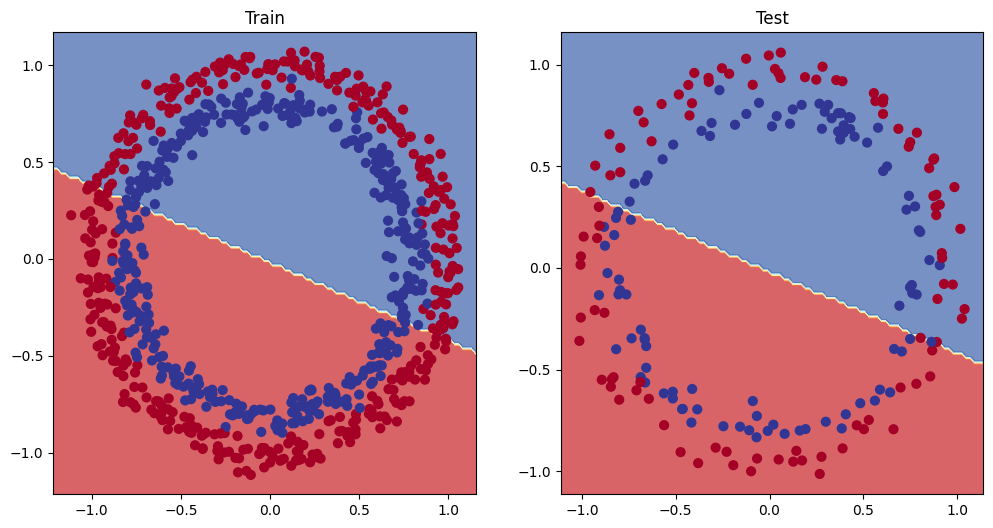

In [64]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

In [67]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5788, -0.5719],
                      [ 0.1803,  0.3667],
                      [ 0.2824,  0.4682],
                      [-0.5713,  0.0149],
                      [ 0.6516,  0.6119]])),
             ('0.bias', tensor([0.0437, 0.2514, 0.2142, 0.0120, 0.2652])),
             ('1.weight',
              tensor([[-0.4159, -0.3864,  0.2020,  0.1026, -0.2276]])),
             ('1.bias', tensor([0.1322]))])

In [68]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)

    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [70]:
##loss function

loss_fn=nn.BCEWithLogitsLoss()

#Optimization function
optimizer=torch.optim.SGD(model_1.parameters(), lr=0.1)

In [79]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
    y_logits=model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))


    #2. Calculate Accuracy/Loss
    loss = loss_fn(y_logits, y_train)
    acc = acc_fn(y_true=y_train, y_pred=y_pred)



    optimizer.zero_grad()


    loss.backward()


    optimizer.step()


    model_1.eval()
    with torch.inference_mode():
        test_logits=model_1(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))

    #2.Calculate Loss
        test_loss=loss_fn(test_logits,
                         y_test)
        test_acc = acc_fn(y_true=y_test, y_pred=test_pred)


    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

        




Epoch: 0 | Loss: 0.69694, Accuracy: 50.00% | Test loss: 0.69903, Test acc: 50.00%
Epoch: 100 | Loss: 0.69303, Accuracy: 51.12% | Test loss: 0.69482, Test acc: 47.50%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 47.50%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69466, Test acc: 46.50%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69466, Test acc: 45.50%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69466, Test acc: 45.50%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69466, Test acc: 45.50%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69466, Test acc: 45.50%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69466, Test acc: 45.50%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69466, Test acc: 45.50%


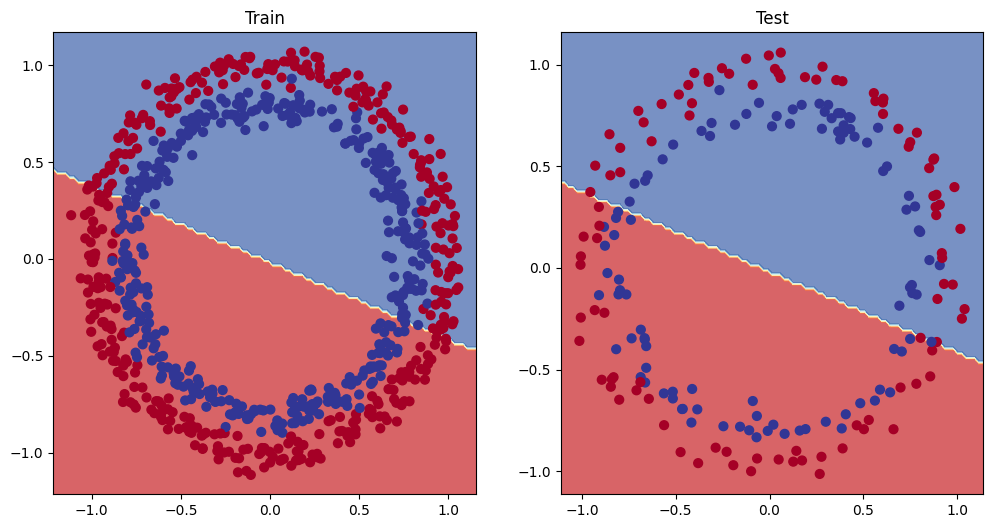

In [80]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

In [81]:

# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [84]:

# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


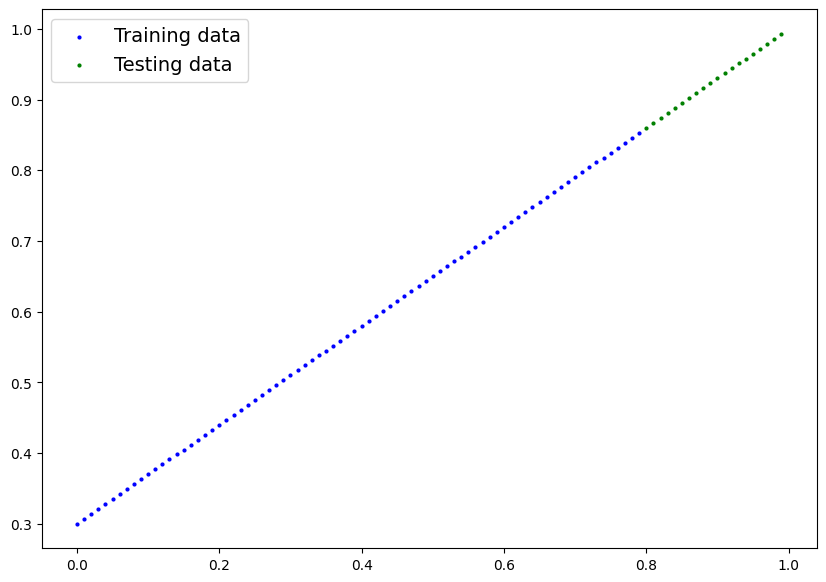

In [85]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [86]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [90]:

# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [91]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training 
    # 1. Forward pass
    y_pred = model_2(X_train_regression)
    
    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward() 

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss 
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.06466, Test loss: 0.12597
Epoch: 100 | Train loss: 0.00743, Test loss: 0.00093
Epoch: 200 | Train loss: 0.00621, Test loss: 0.00123
Epoch: 300 | Train loss: 0.00619, Test loss: 0.00116
Epoch: 400 | Train loss: 0.00617, Test loss: 0.00094
Epoch: 500 | Train loss: 0.00646, Test loss: 0.00138
Epoch: 600 | Train loss: 0.00614, Test loss: 0.00110
Epoch: 700 | Train loss: 0.00612, Test loss: 0.00103
Epoch: 800 | Train loss: 0.00641, Test loss: 0.00149
Epoch: 900 | Train loss: 0.00639, Test loss: 0.00118


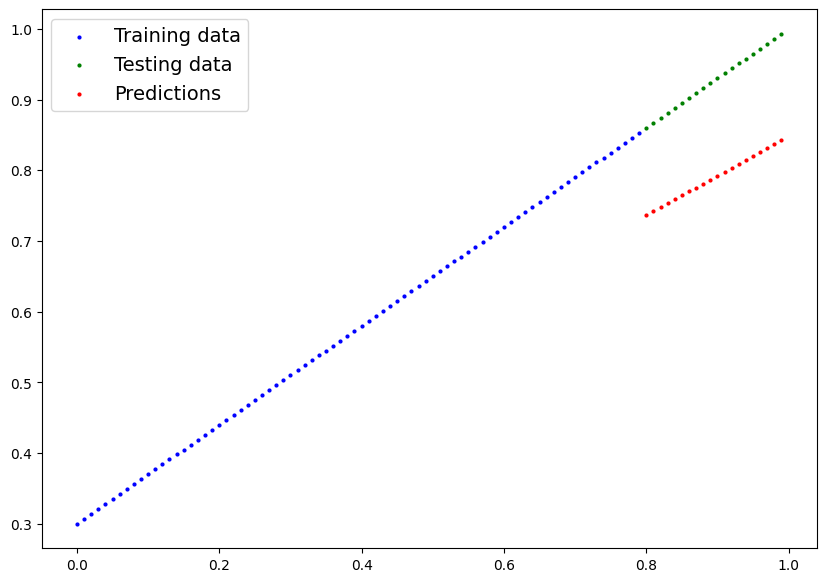

In [89]:

# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());